In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import dash
import json
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Read data from JSON file
with open('fertility_gdp_2014_2024.json') as f:
    data = json.load(f)

# Convert JSON data to pandas DataFrame
df = pd.DataFrame(data)

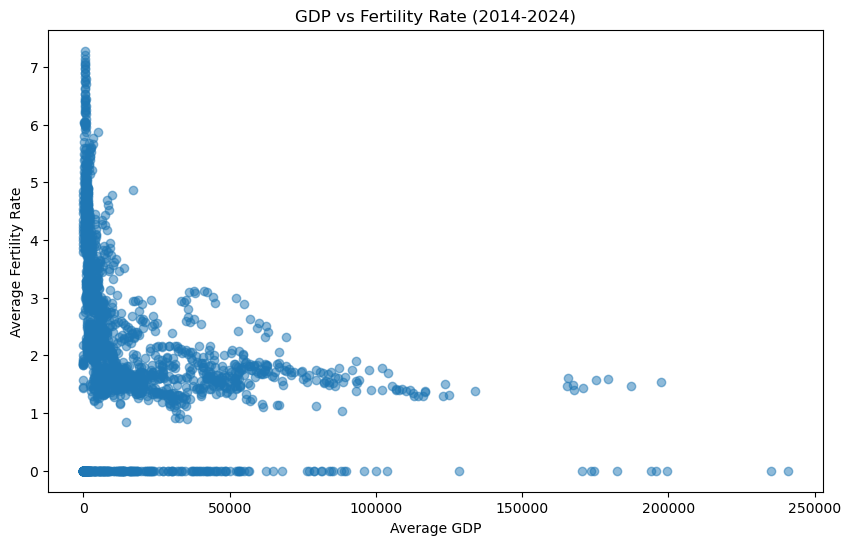

In [26]:
# Filter data for years 2014-2024 (assuming the 'Year' column exists in your JSON)
df_filtered = df[df['Year'].between(2014, 2024)]

# Plot GDP vs Fertility Rate
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['GDP'], df_filtered['Fertility Rate'], alpha=0.5)
plt.title('GDP vs Fertility Rate (2014-2024)')
plt.xlabel('Average GDP')
plt.ylabel('Average Fertility Rate')
plt.show()

In [27]:
# Create a scatter plot using Plotly
fig = px.scatter(df_filtered, x='GDP', y='Fertility Rate', color='Country Name',
                 title='GDP vs Fertility Rate (2014-2024)',
                 labels={'GDP': 'Average GDP', 'Fertility Rate': 'Average Fertility Rate'})
fig.show()

In [30]:
# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Global Fertility Rate and GDP Dashboard"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df_filtered['Country Name'].unique()],
        value='Cuba',  # default value
        multi=False
    ),
    dcc.Graph(id='gdp-vs-fertility')
])

@app.callback(
    Output('gdp-vs-fertility', 'figure'),
    Input('country-dropdown', 'value')
)
def update_graph(selected_country):
    country_data = df_filtered[df_filtered['Country Name'] == selected_country]
    fig = px.scatter(country_data, x='GDP', y='Fertility Rate', 
                     title=f'GDP vs Fertility Rate for {selected_country}', 
                     labels={'GDP': 'Average GDP', 'Fertility Rate': 'Average Fertility Rate'})
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [33]:
# Filter for year 2022
df_2022 = df[df['Year'] == 2022]

# Plot a Choropleth Map based on fertility rates for year 2022
fig = px.choropleth(df_2022, 
                    locations='Country Code',  # column with country codes
                    color='Fertility Rate',    # column to use for color
                    hover_name='Country Name',  # Replace with actual country name column
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    labels={'fertility_rate': 'Fertility Rate'},  # label for color legend
                    title="Global Fertility Rates in 2022")

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Display the map
fig.show()

In [35]:
# Scatter plot for Fertility vs GDP with color by region (replace with 'region' if available)
fig = px.scatter(df_2022, x='GDP', y='Fertility Rate', 
                 color='Country Name',  # Replace with 'region' if available
                 size='GDP',           # Bubble size
                 hover_name='Country Name',
                 labels={'GDP':'GDP per Capita', 'fertility_rate':'Fertility Rate'},
                 title="Fertility Rate vs GDP Per Capita in 2022")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')),
                 selector=dict(mode='markers'))

# Display the plot
fig.show()

In [40]:
# Top 10 countries by fertility rate (2022)
df_top10 = df_2022.groupby('Country Name')['Fertility Rate'].mean().sort_values(ascending=False).head(10).reset_index()

# Bar chart for top 10 Fertility Rates (2022)
fig = px.bar(df_top10, x='Country Name', y='Fertility Rate', 
             labels={'Fertility Rate':'Average Fertility Rate', 'Country Name':'Country'},
             title='Top 10 Countries by Fertility Rate in 2022')

fig.show()


In [42]:
# Filter out rows with null or 0 fertility rate before grouping
df_filtered_2022 = df_2022[df_2022['Fertility Rate'] > 0]  # Filter for values greater than 0

# Bottom 10 countries by fertility rate (2022)
df_bottom10 = df_filtered_2022.groupby('Country Name')['Fertility Rate'].mean().sort_values(ascending=True).head(10).reset_index()

# Bar chart for bottom 10 Fertility Rates (2022)
fig = px.bar(df_bottom10, x='Country Name', y='Fertility Rate', 
             labels={'Fertility Rate':'Average Fertility Rate', 'Country Name':'Country'},
             title='Bottom 10 Countries by Fertility Rate in 2022')

fig.show()